In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_white = pd.read_csv(
    r"C:\Users\dimma\OneDrive\Υπολογιστής\Ο.Π.Α\Supervised Learning\2η Εργασια\wine+quality\winequality-white.csv",
    sep=";", decimal=".")

# EDA with the White Wines

In [3]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,1.548363,3.188267,0.489847,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,6.838541,0.151001,0.114126,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,103.898000,3.820000,1.080000,9.000000


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   object 
 11  quality               4898 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 459.3+ KB


In [6]:
  #We have no null values and all the features are in the right Dtype except alcohol
df_white['alcohol'].unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [7]:
#We transform the alcohol into float
df_white['alcohol'] = pd.to_numeric(df_white['alcohol'], errors='coerce')

In [8]:
alcohol_median = df_white[
    'alcohol'].median()  #We did that because during the training of the algorithm we found out that some values where NaN since we had coerce in errors
df_white['alcohol'] = df_white['alcohol'].fillna(alcohol_median)

# Univariate Analysis

In [9]:
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
#We create a function to use for each numeric feature

def histogram_boxplot(df_white, column, bins=8, color='green', figsize=(10, 7)):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # Histogram
    df_white[column].hist(bins=bins, ax=ax1, color=color, edgecolor='black')
    ax1.set_title(f'{column} - Histogram')

    # Boxplot
    df_white.boxplot(column=column, ax=ax2, vert=False)
    ax2.set_title(f'{column} - Boxplot')

    plt.tight_layout()
    plt.show()

In [11]:
# We create a function to detect outliers
def detect_outliers(df_white, column_name):
    # Calculating Q1, Q2, IQR
    Q1 = df_white[column_name].quantile(0.25)
    Q3 = df_white[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Setting Boundaries
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # We detect the Outliers
    outliers_mask = (df_white[column_name] < lower) | (df_white[column_name] > upper)

    # Calculate the sum, and percentage of outliers
    outliers_count = outliers_mask.sum()
    total_count = len(df_white)
    outliers_percentage = (outliers_count / total_count) * 100

    print(f"Column: '{column_name}'")
    print(f"- Number of outliers: {outliers_count}")
    print(f"- Percentage of outliers: {outliers_percentage:.2f}%")
    print("-" * 30)

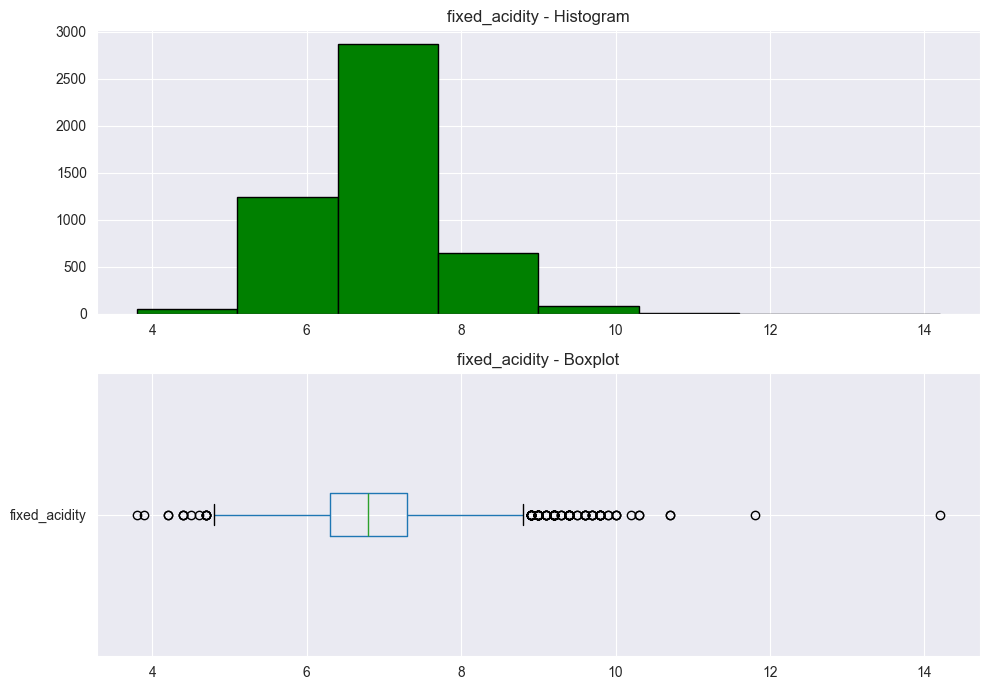

In [12]:
histogram_boxplot(df_white, 'fixed_acidity')

In [13]:
detect_outliers(df_white, 'fixed_acidity')

Column: 'fixed_acidity'
- Number of outliers: 119
- Percentage of outliers: 2.43%
------------------------------


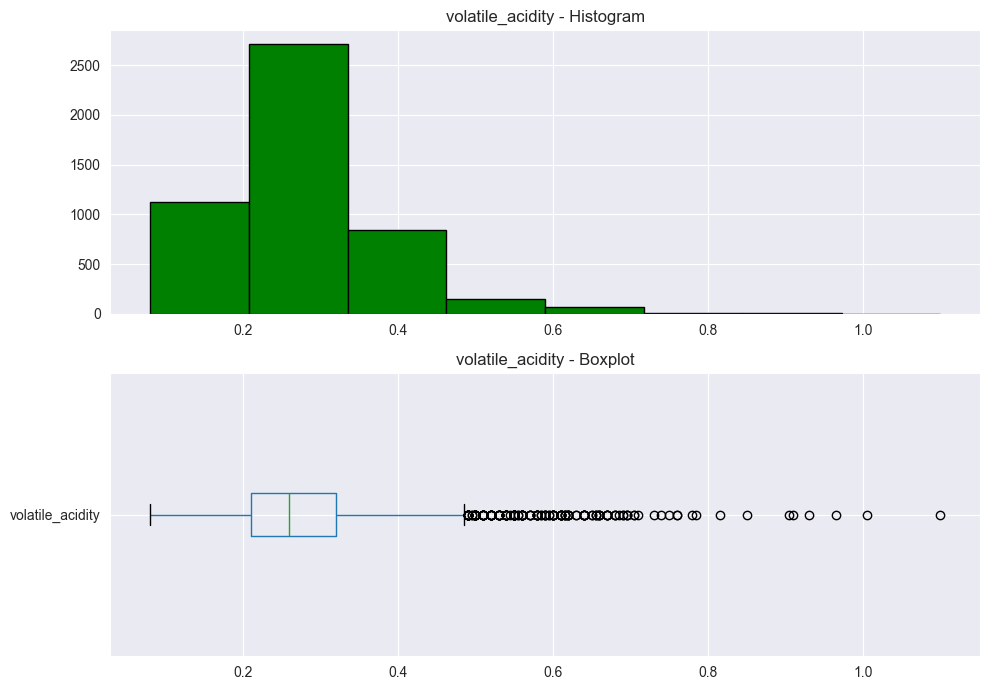

In [14]:
histogram_boxplot(df_white, "volatile_acidity")

In [15]:
detect_outliers(df_white, 'volatile_acidity')

Column: 'volatile_acidity'
- Number of outliers: 186
- Percentage of outliers: 3.80%
------------------------------


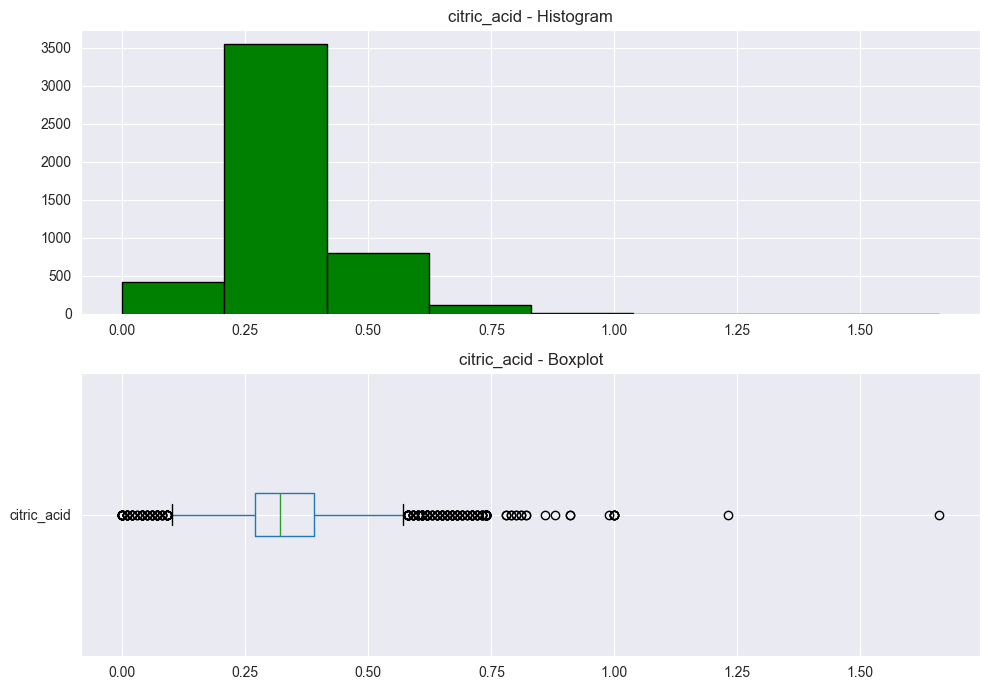

In [16]:
histogram_boxplot(df_white, 'citric_acid')

In [17]:
detect_outliers(df_white, 'citric_acid')

Column: 'citric_acid'
- Number of outliers: 270
- Percentage of outliers: 5.51%
------------------------------


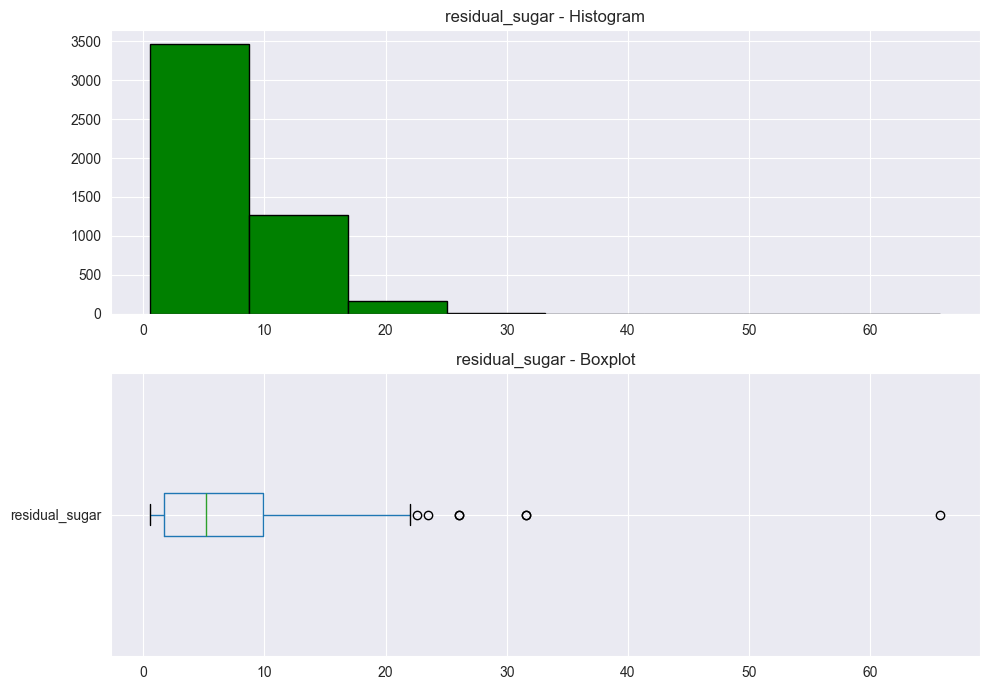

In [18]:
histogram_boxplot(df_white, 'residual_sugar')

In [19]:
detect_outliers(df_white, 'residual_sugar')

Column: 'residual_sugar'
- Number of outliers: 7
- Percentage of outliers: 0.14%
------------------------------


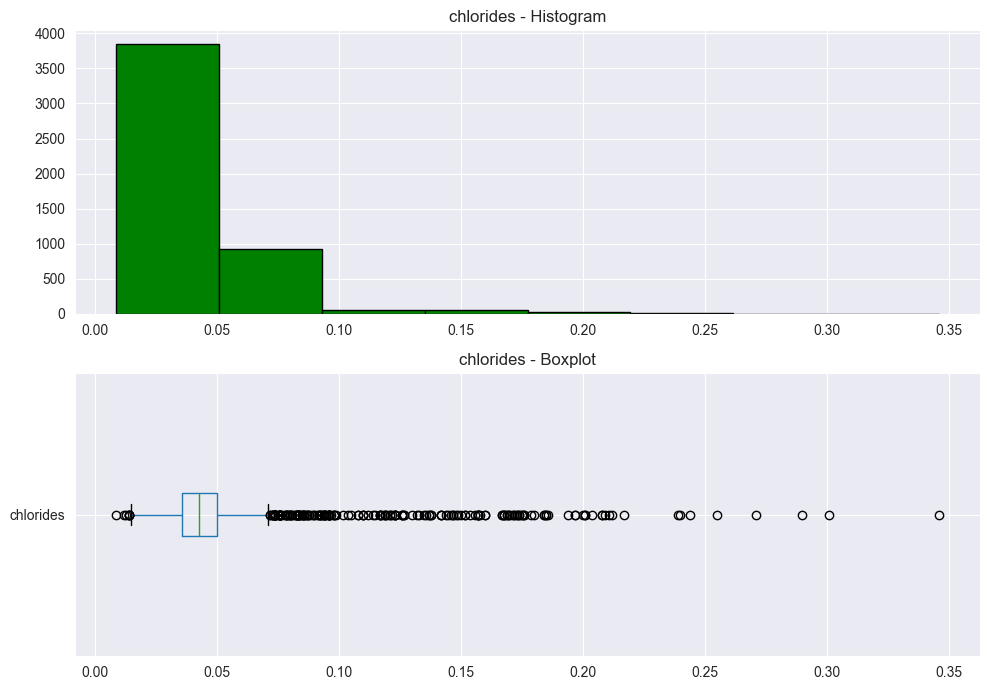

In [20]:
histogram_boxplot(df_white, 'chlorides')

In [21]:
detect_outliers(df_white, 'chlorides')

Column: 'chlorides'
- Number of outliers: 208
- Percentage of outliers: 4.25%
------------------------------


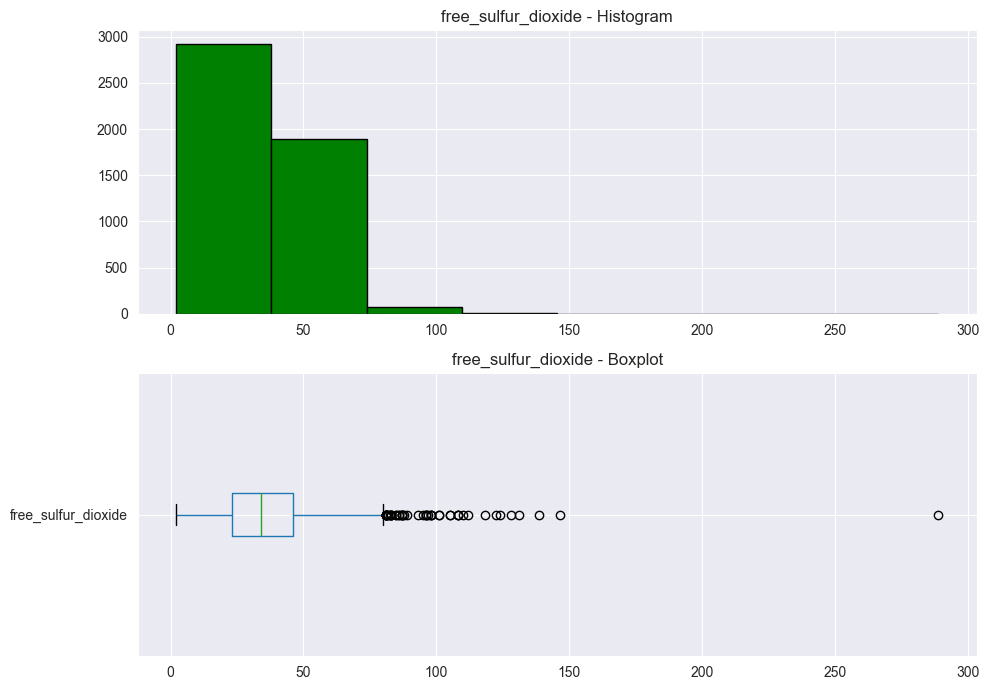

In [22]:
histogram_boxplot(df_white, 'free_sulfur_dioxide')

In [23]:
detect_outliers(df_white, 'free_sulfur_dioxide')

Column: 'free_sulfur_dioxide'
- Number of outliers: 50
- Percentage of outliers: 1.02%
------------------------------


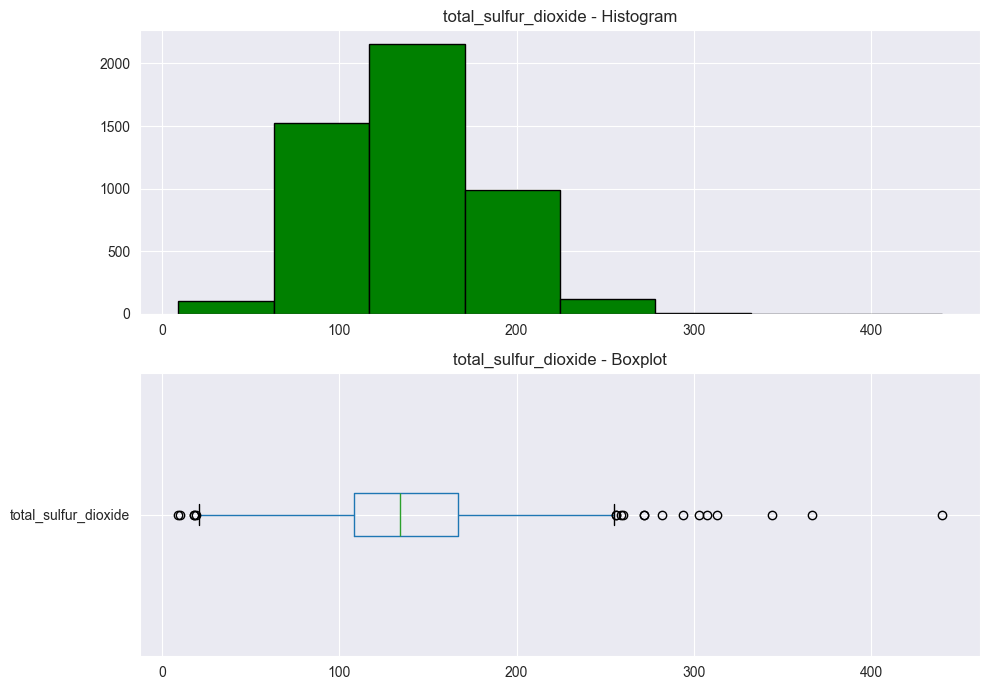

In [24]:
histogram_boxplot(df_white, 'total_sulfur_dioxide')

In [25]:
detect_outliers(df_white, 'total_sulfur_dioxide')

Column: 'total_sulfur_dioxide'
- Number of outliers: 19
- Percentage of outliers: 0.39%
------------------------------


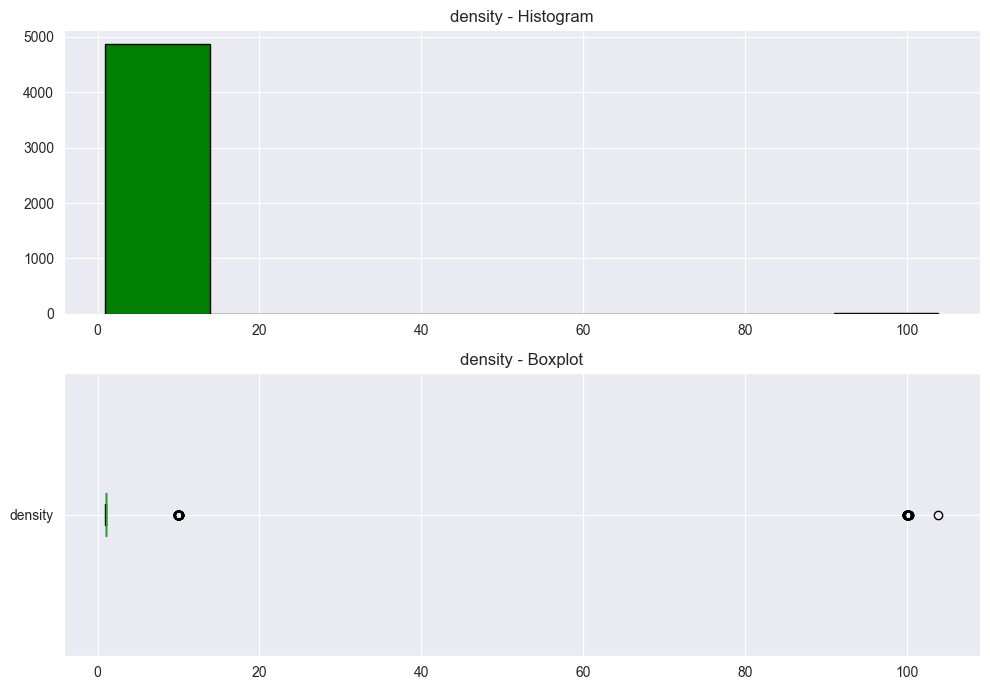

In [26]:
histogram_boxplot(df_white, 'density')

In [27]:
detect_outliers(df_white, 'density')

Column: 'density'
- Number of outliers: 71
- Percentage of outliers: 1.45%
------------------------------


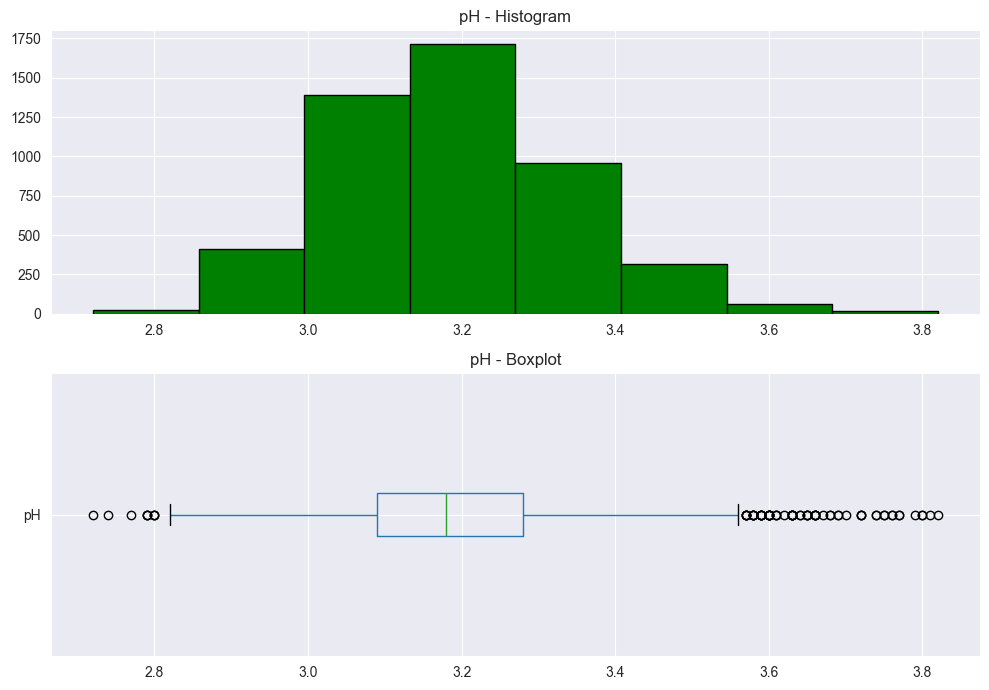

In [28]:
histogram_boxplot(df_white, 'pH')

In [29]:
detect_outliers(df_white, 'pH')

Column: 'pH'
- Number of outliers: 75
- Percentage of outliers: 1.53%
------------------------------


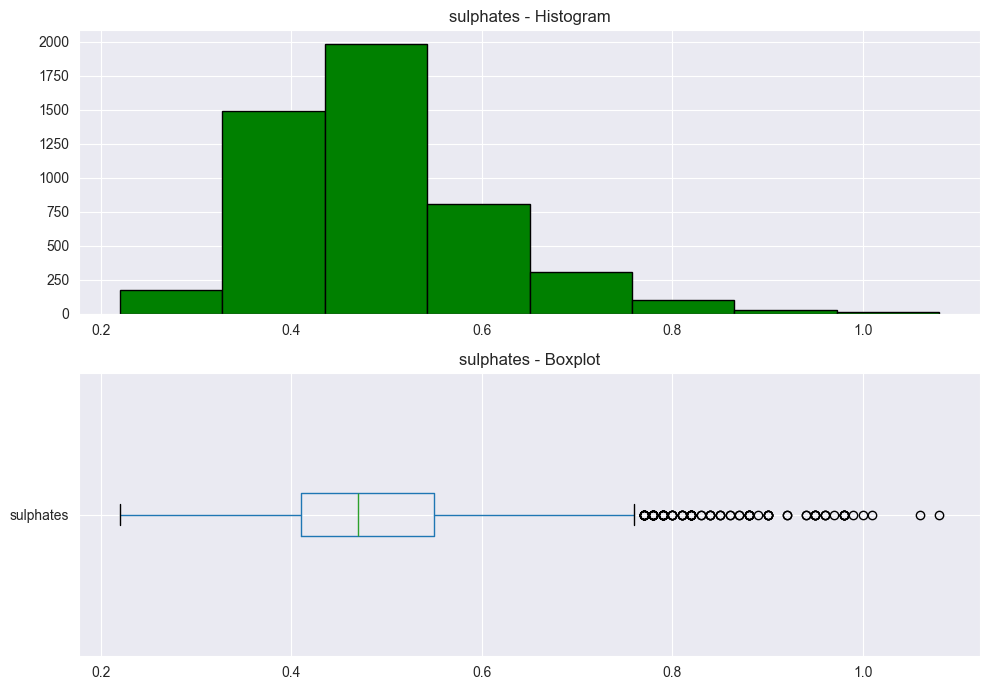

In [30]:
histogram_boxplot(df_white, 'sulphates')

In [31]:
detect_outliers(df_white, 'sulphates')

Column: 'sulphates'
- Number of outliers: 124
- Percentage of outliers: 2.53%
------------------------------


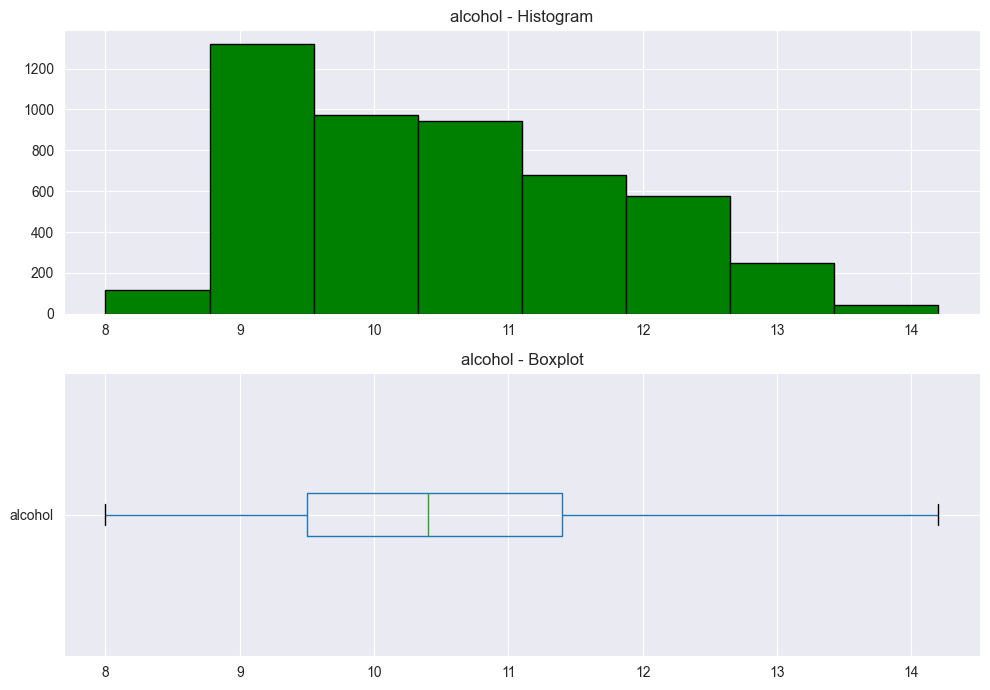

In [32]:
histogram_boxplot(df_white, 'alcohol')

In [33]:
detect_outliers(df_white, 'alcohol')

Column: 'alcohol'
- Number of outliers: 0
- Percentage of outliers: 0.00%
------------------------------


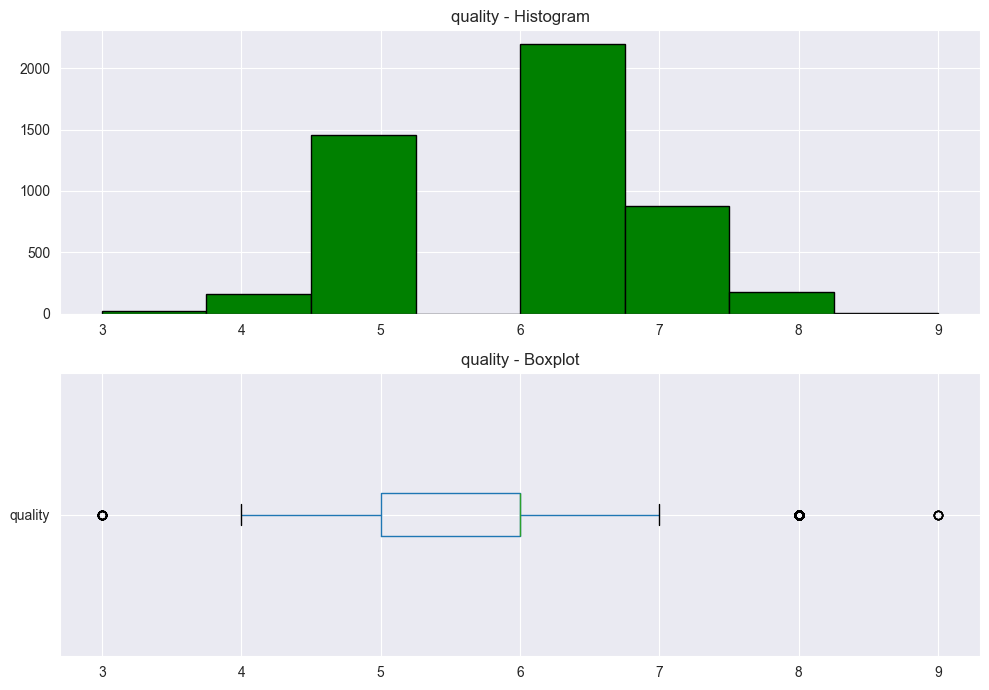

In [34]:
histogram_boxplot(df_white, 'quality')

In [35]:
detect_outliers(df_white, 'quality')

Column: 'quality'
- Number of outliers: 200
- Percentage of outliers: 4.08%
------------------------------


In [36]:
df_white.value_counts('quality').sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

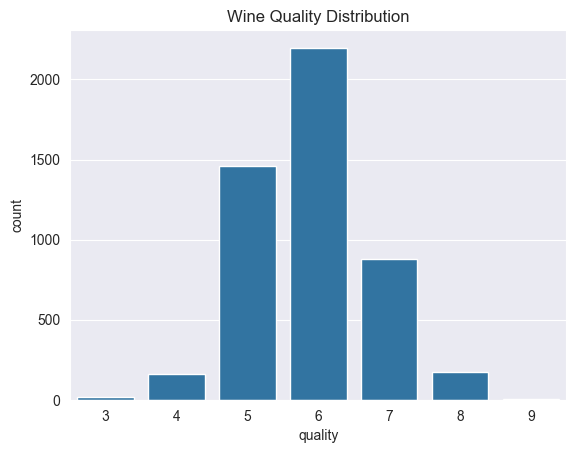

In [37]:
#We make a barplot to see the distribution of the Quality in the White Wines
sns.countplot(x='quality', data=df_white)
plt.title('Wine Quality Distribution')
plt.show()


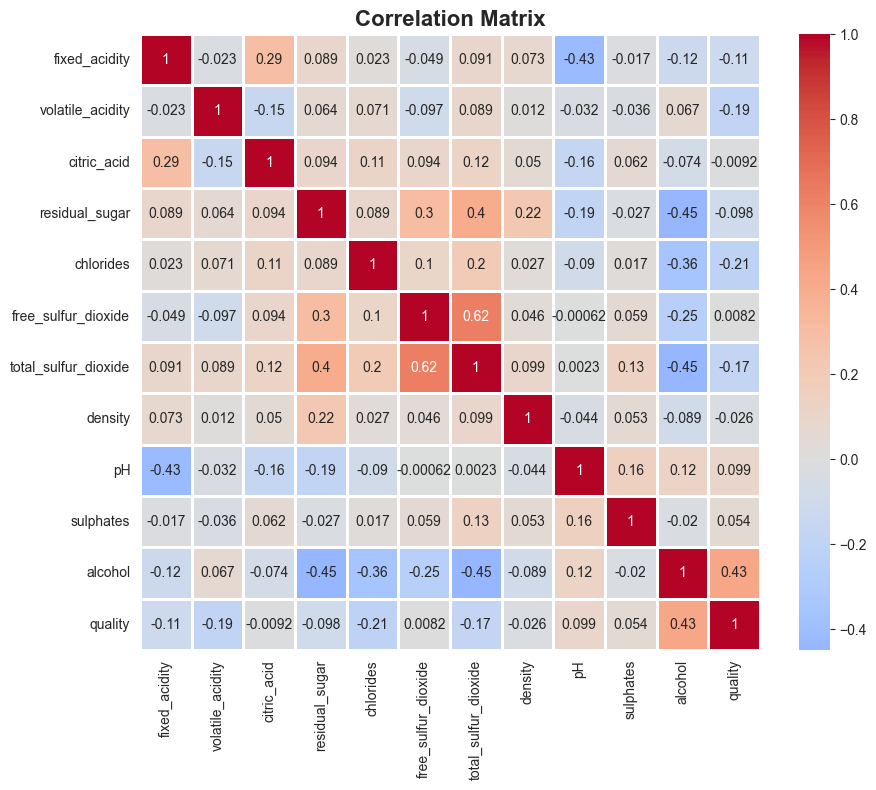

In [38]:
#We create the Correlation Matrix between the features
plt.figure(figsize=(10, 8))
sns.heatmap(df_white.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

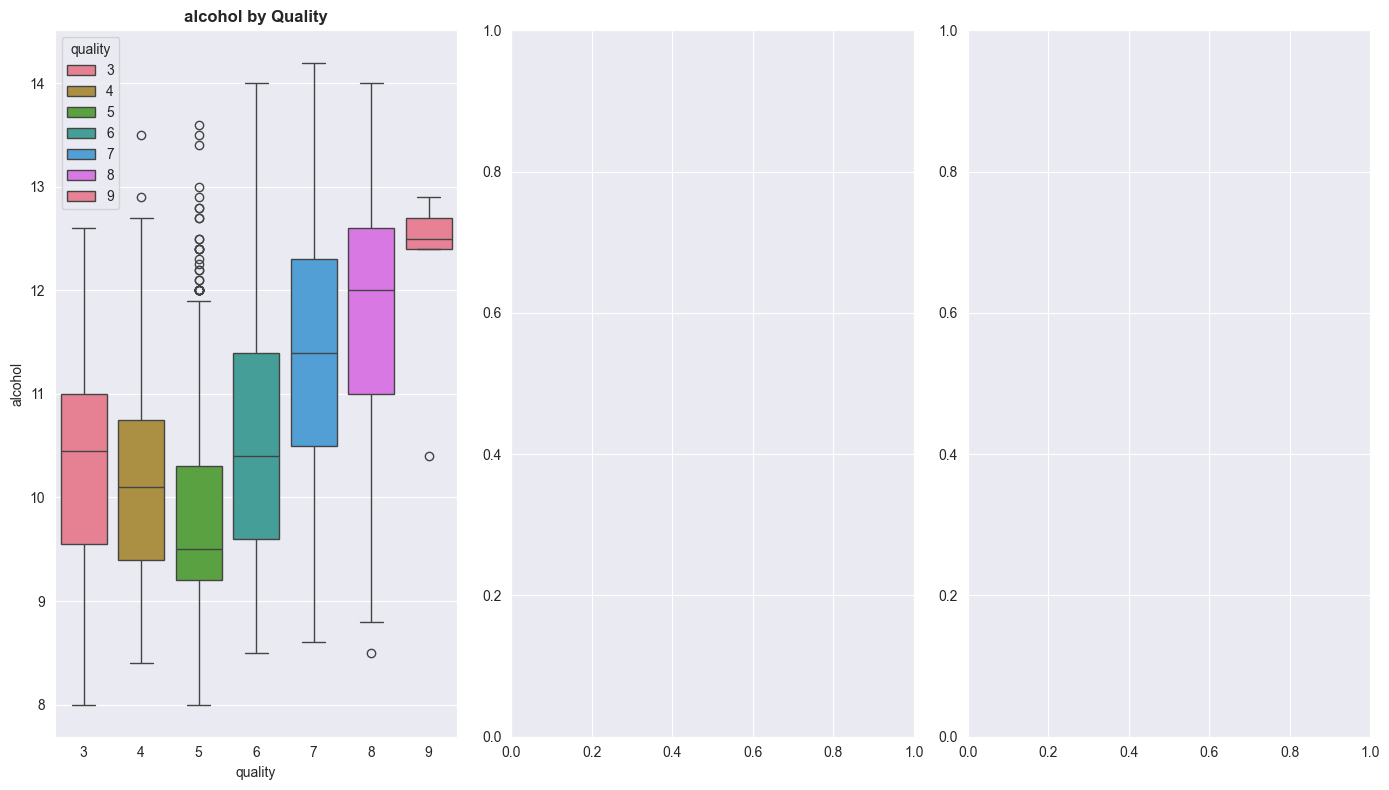

In [39]:
#We make a combined boxplot of the features which seems to have a positive correlation with the quality. The feature alcohol has the highest correlation with 0,43
num_cols = ['alcohol']

fig, axes = plt.subplots(1, 3, figsize=(14, 8))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_white, x='quality', y=col, ax=axes[i], palette='husl', hue='quality')
    axes[i].set_title(f'{col} by Quality', fontweight='bold')
plt.tight_layout()
plt.show()

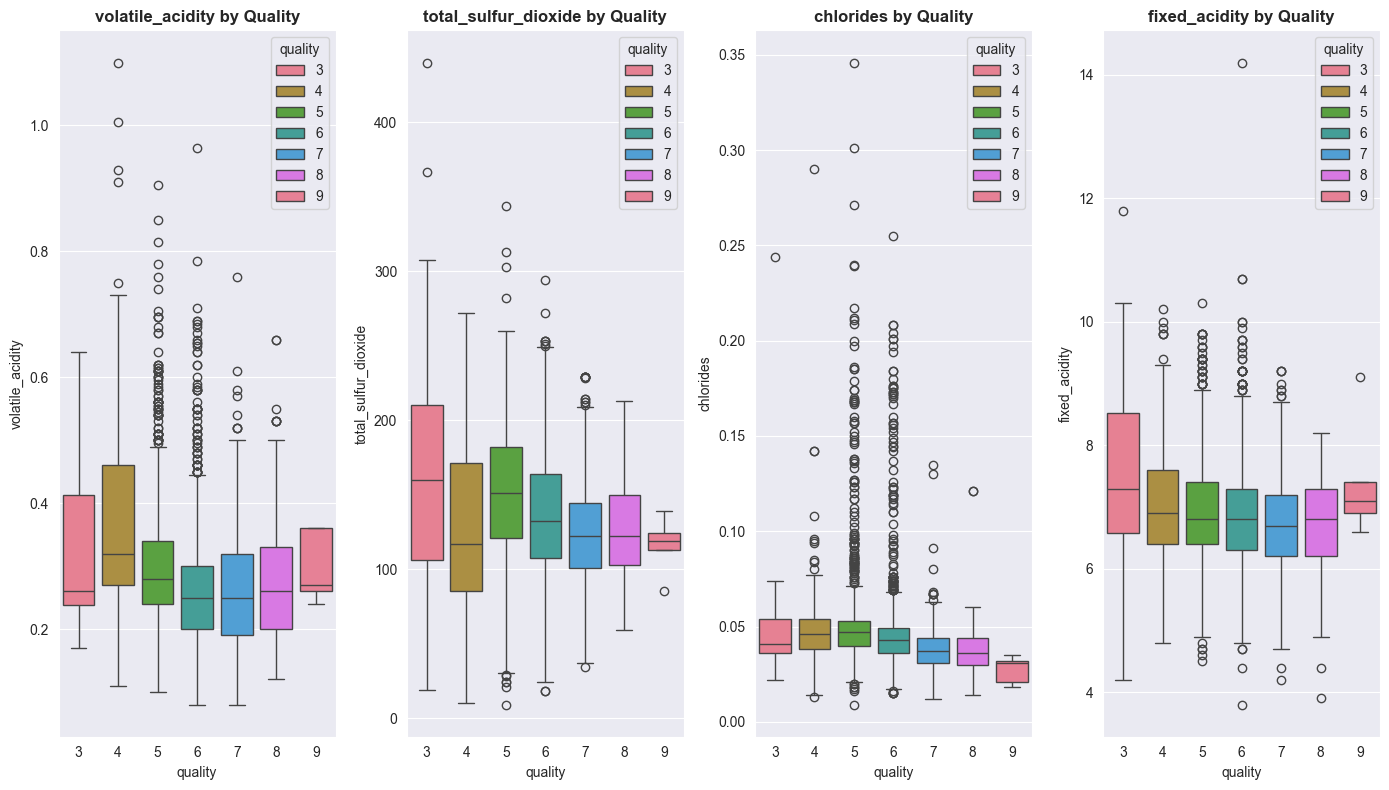

In [40]:
#We make a combined boxplot of the features which seems to have a negative correlation with the quality. The feature volatile acidity has the most negative correlation with 0,48
num_cols = ['volatile_acidity', 'total_sulfur_dioxide', 'chlorides','fixed_acidity']

fig, axes = plt.subplots(1, 4, figsize=(14, 8))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_white, x='quality', y=col, ax=axes[i], palette='husl', hue='quality')
    axes[i].set_title(f'{col} by Quality', fontweight='bold')
plt.tight_layout()
plt.show()

# Splitting and Scaling the Dataset

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

quality_label
Good    3258
Bad     1640
Name: count, dtype: int64


<Axes: xlabel='quality_label', ylabel='count'>

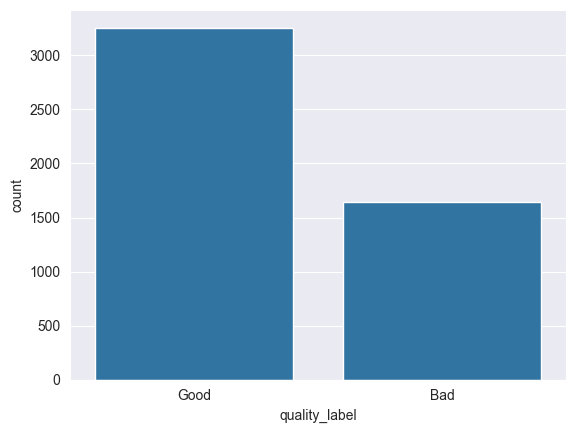

In [42]:
# We make a binary encoding
df_white['quality_bin'] = df_white['quality'].apply(
    lambda x: 1 if x >= 6 else 0)  #We set a threshold of x>=6 to make the dataset more balanced
df_white['quality_label'] = df_white['quality_bin'].map({0: 'Bad', 1: 'Good'})  #We give labels 0=Bad, 1=Good
print(df_white['quality_label'].value_counts())
sns.countplot(x='quality_label', data=df_white)

In [43]:
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_bin',
       'quality_label'],
      dtype='object')

In [44]:
X = df_white.drop(['quality', 'quality_bin', 'quality_label'],
                axis=1)  # y is our binary target column, We drop the other quality columns to avoid Data Leakage
y = df_white['quality_bin']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
#Implementing the Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("df_white shape:", df_white.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

df_white shape: (4898, 14)
X_train shape: (3918, 11)
X_test shape: (980, 11)


#  Training the Models

## SVM Linear

In [47]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

In [48]:
#We start with SVM and kernel Linear
svm_linear = SVC(kernel='linear', probability=True, max_iter=50000)
svm_linear.fit(X_train_scaled, y_train)

C:\Users\dimma\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


--- SVM Linear Performance ---
Accuracy: 0.7398
F1-Score: 0.8185
ROC AUC:  0.7861

Classification Report:
              precision    recall  f1-score   support

    Bad (<6)       0.66      0.46      0.54       328
  Good (>=6)       0.76      0.88      0.82       652

    accuracy                           0.74       980
   macro avg       0.71      0.67      0.68       980
weighted avg       0.73      0.74      0.73       980



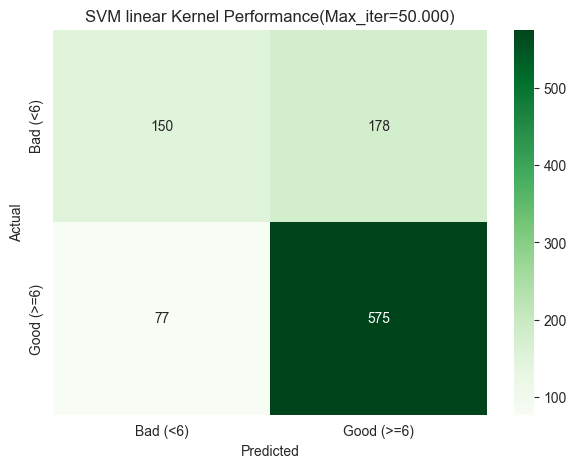

In [49]:

#We print the metrics for the SVM Linear without Grid Search
y_pred_linear = svm_linear.predict(X_test_scaled)
y_prob_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]

acc_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)
roc_auc_linear = roc_auc_score(y_test, y_prob_linear)  #We Use Probabilities  for the ROC-AUC

print(f"--- SVM Linear Performance ---")
print(f"Accuracy: {acc_linear:.4f}")
print(f"F1-Score: {f1_linear:.4f}")
print(f"ROC AUC:  {roc_auc_linear:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=['Bad (<6)', 'Good (>=6)']))

cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM linear Kernel Performance(Max_iter=50.000)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [50]:
#Testing for Overfitting
y_train_pred_lin = svm_linear.predict(X_train_scaled)
y_test_pred_lin = svm_linear.predict(X_test_scaled)

print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_lin):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_lin):.4f}")

Accuracy on Train Set: 0.7550
Accuracy on Test Set: 0.7398


## SVM RBF

--- SVM RBF Performance ---
Accuracy: 0.7806
F1-Score: 0.8397
ROC AUC:  0.8297

Classification Report:
              precision    recall  f1-score   support

    Bad (<6)       0.69      0.62      0.65       328
  Good (>=6)       0.82      0.86      0.84       652

    accuracy                           0.78       980
   macro avg       0.76      0.74      0.75       980
weighted avg       0.78      0.78      0.78       980



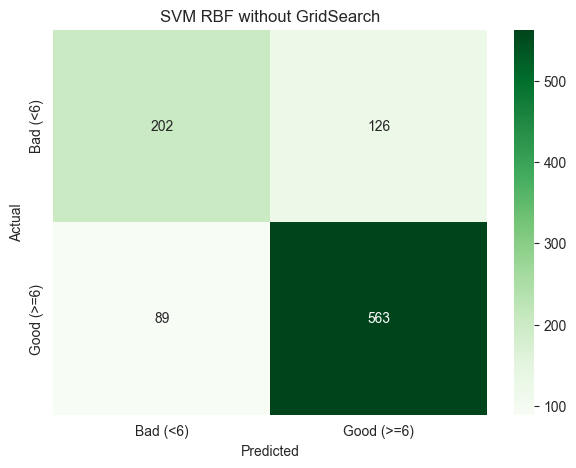

In [51]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_prob_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

acc_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
roc_auc_rbf = roc_auc_score(y_test, y_prob_rbf)

print(f"--- SVM RBF Performance ---")
print(f"Accuracy: {acc_rbf:.4f}")
print(f"F1-Score: {f1_rbf:.4f}")
print(f"ROC AUC:  {roc_auc_rbf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=['Bad (<6)', 'Good (>=6)']))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM RBF without GridSearch')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
#Testing for Overfitting
y_train_pred_rbf = svm_rbf.predict(X_train_scaled)
y_test_pred_rbf = svm_rbf.predict(X_test_scaled)

print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_rbf):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_rbf):.4f}")

Accuracy on Train Set: 0.8065
Accuracy on Test Set: 0.7806


## SVM RBF with GridSearch

In [53]:
#Implementing a Grid Search for the parameters because the  SVM has a very low performance
from sklearn.model_selection import GridSearchCV

#Trying Different Parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 100, 10, 0.1, 0.01, 0.001],

}

# We use  f1_weighted as a metric to find best balance
grid = GridSearchCV(
    SVC(probability=True, class_weight='balanced'),
    param_grid,
    cv=10,
    scoring='f1_weighted',
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
best_predictions = grid.predict(X_test_scaled)
best_probabilities = grid.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, best_predictions))
acc_best_pred = accuracy_score(y_test, best_predictions)
f1_best_pred = f1_score(y_test, best_predictions)
roc_auc_best_pred = roc_auc_score(y_test, best_probabilities)

print(f"--- SVM RBF with GridSearch ---")
print(f"Accuracy: {acc_best_pred:.4f}")
print(f"F1-Score: {f1_best_pred:.4f}")
print(f"ROC AUC:  {roc_auc_best_pred:.4f}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       328
           1       0.83      0.78      0.81       652

    accuracy                           0.75       980
   macro avg       0.72      0.73      0.73       980
weighted avg       0.76      0.75      0.75       980

--- SVM RBF with GridSearch ---
Accuracy: 0.7500
F1-Score: 0.8060
ROC AUC:  0.8170


In [54]:
#Testing for Overfitting
y_train_best_pred_rbf = grid.predict(X_train_scaled)
y_test_best_pred_rbf = grid.predict(X_test_scaled)

print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_best_pred_rbf):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_best_pred_rbf):.4f}")

Accuracy on Train Set: 0.9201
Accuracy on Test Set: 0.7500


#### Because we found Overfitting in the first GridSearch Parameters we try less aggressive parameters

In [55]:
param_grid_2 = {
    'C': [0.5, 1, 2, 5],
    'gamma': ['scale', 0.05, 0.1, 0.2]
}

grid_2 = GridSearchCV(
    SVC(kernel='rbf', probability=True),
    param_grid_2,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid_2.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_2.best_params_}")
best_predictions_2 = grid_2.predict(X_test_scaled)
best_probabilities_2 = grid_2.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, best_predictions_2))
acc_best_pred2 = accuracy_score(y_test, best_predictions_2)
f1_best_pred2 = f1_score(y_test, best_predictions_2)
roc_auc_best_pred2 = roc_auc_score(y_test, best_probabilities_2)

print(f"--- SVM RBF with GridSearch 2 ---")
print(f"Accuracy: {acc_best_pred2:.4f}")
print(f"F1-Score: {f1_best_pred2:.4f}")
print(f"ROC AUC:  {roc_auc_best_pred2:.4f}")

Best Parameters: {'C': 2, 'gamma': 0.2}
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       328
           1       0.84      0.87      0.86       652

    accuracy                           0.80       980
   macro avg       0.78      0.77      0.77       980
weighted avg       0.80      0.80      0.80       980

--- SVM RBF with GridSearch 2 ---
Accuracy: 0.8031
F1-Score: 0.8552
ROC AUC:  0.8477


In [56]:
#Testing for Overfitting
y_train_best_pred_rbf2 = grid_2.predict(X_train_scaled)
y_test_best_pred_rbf2 = grid_2.predict(X_test_scaled)

print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_best_pred_rbf2):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_best_pred_rbf2):.4f}")

Accuracy on Train Set: 0.8780
Accuracy on Test Set: 0.8031


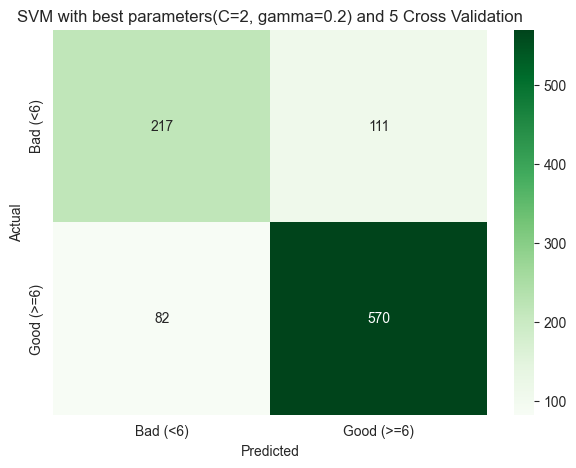

In [58]:
cm_best_pred = confusion_matrix(y_test, best_predictions_2)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_best_pred, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM with best parameters(C=2, gamma=0.2) and 5 Cross Validation')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Decision Tree

In [59]:
# Trying different depths in the tree, Here we DO NOT use the Scaled Data since the decision trees can handle unscaled data
for depth in [3, 5, 7, 9, ]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    print(f"Depth: {depth} -> Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_weighted')
grid_dt.fit(X_train, y_train)

print(f"Best DT Params: {grid_dt.best_params_}")
best_dt = grid_dt.best_estimator_

Depth: 3 -> Accuracy: 0.7480
Depth: 5 -> Accuracy: 0.7398
Depth: 7 -> Accuracy: 0.7357
Depth: 9 -> Accuracy: 0.7592
Best DT Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [60]:
#Because we suggest max depth=None we try to see if the model is overfitting
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_dt):.4f}")

Accuracy on Train Set: 1.0000
Accuracy on Test Set: 0.7867


In [61]:
# Trying a Decision Tree with Max Depth=5
simple_dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
simple_dt.fit(X_train, y_train)
simple_dt_train_pred = simple_dt.predict(X_train)
simple_dt_test_pred = simple_dt.predict(X_test)

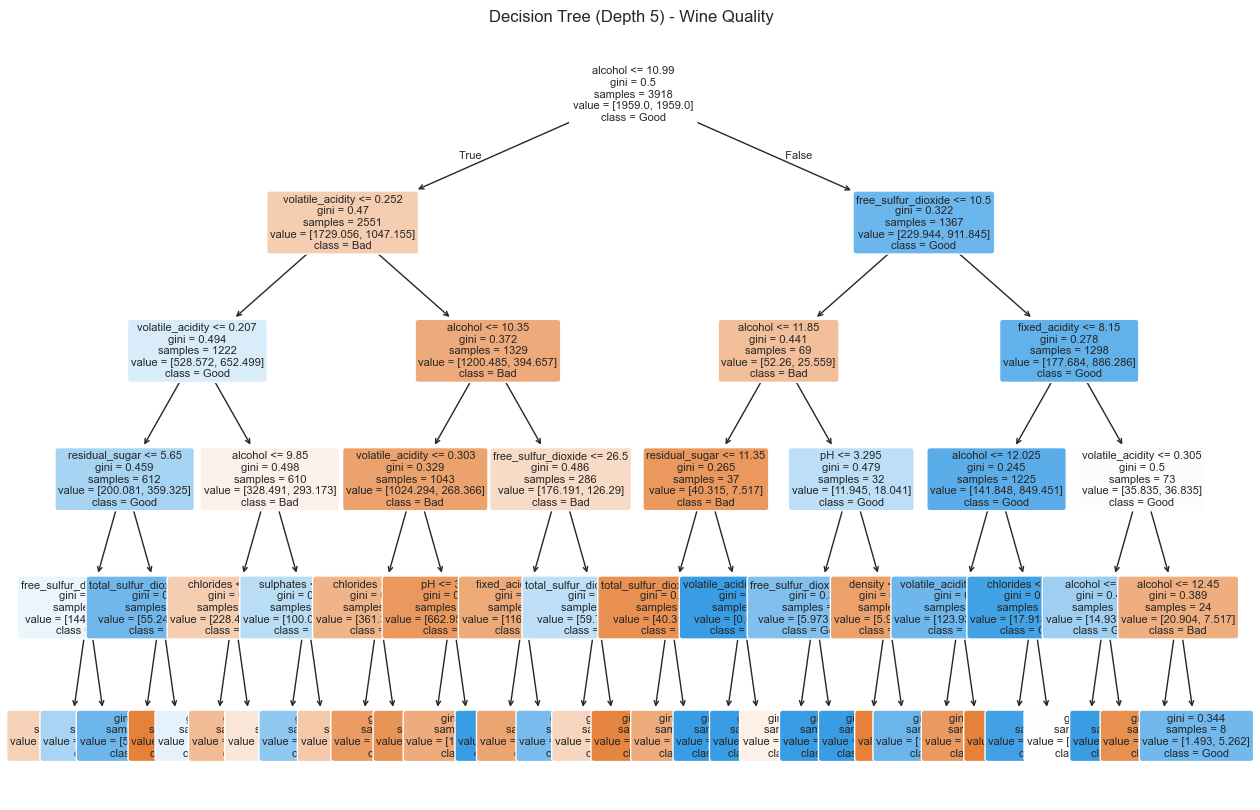

In [62]:
# Making the tree Plot
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(simple_dt,
          feature_names=X.columns,
          class_names=['Bad', 'Good'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree (Depth 5) - Wine Quality ")
plt.show()

Accuracy on Train Set: 0.7586
Accuracy on Test Set: 0.7184
              precision    recall  f1-score   support

           0       0.56      0.75      0.64       328
           1       0.85      0.70      0.77       652

    accuracy                           0.72       980
   macro avg       0.70      0.73      0.70       980
weighted avg       0.75      0.72      0.73       980

Decision Tree Max Depth=5
Accuracy: 0.7184
F1-Score: 0.7681
ROC AUC:  0.7270


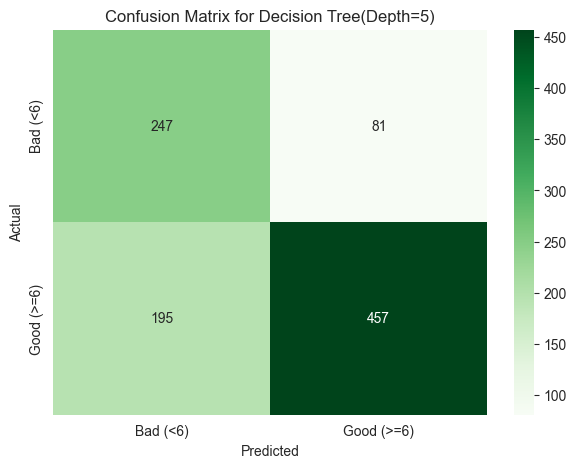

In [63]:
cm_best_pred_dt = confusion_matrix(y_test, simple_dt_test_pred)

print(f"Accuracy on Train Set: {accuracy_score(y_train, simple_dt_train_pred):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, simple_dt_test_pred):.4f}")

print(classification_report(y_test, simple_dt_test_pred))
acc_simple_dt = accuracy_score(y_test, simple_dt_test_pred)
f1_simple_dt = f1_score(y_test, simple_dt_test_pred)
roc_auc_simple_dt = roc_auc_score(y_test, simple_dt_test_pred)

print(f"Decision Tree Max Depth=5")
print(f"Accuracy: {acc_simple_dt:.4f}")
print(f"F1-Score: {f1_simple_dt:.4f}")
print(f"ROC AUC:  {roc_auc_simple_dt:.4f}")

plt.figure(figsize=(7, 5))
sns.heatmap(cm_best_pred_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('Confusion Matrix for Decision Tree(Depth=5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visual Comparison

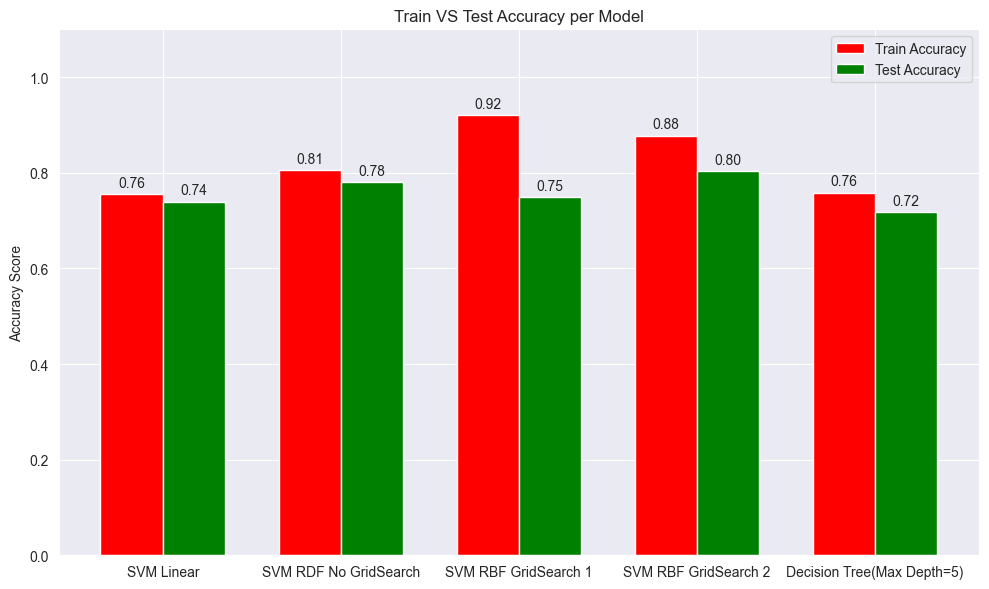

In [64]:
# Comparing the  Models with a Barplot
models = ['SVM Linear', 'SVM RDF No GridSearch', 'SVM RBF GridSearch 1','SVM RBF GridSearch 2','Decision Tree(Max Depth=5)']
train_acc = [0.7550, 0.8065, 0.9201,0.8780, 0.7586]  # The Training set values
test_acc = [0.7398, 0.7806, 0.7500,0.8031, 0.7184]  # The Test set values

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width / 2, train_acc, width, label='Train Accuracy', color='red')
rects2 = ax.bar(x + width / 2, test_acc, width, label='Test Accuracy', color='green')

# Adding Labels
ax.set_ylabel('Accuracy Score')
ax.set_title('Train VS Test Accuracy per Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1)


# This function puts labels over the Barplot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

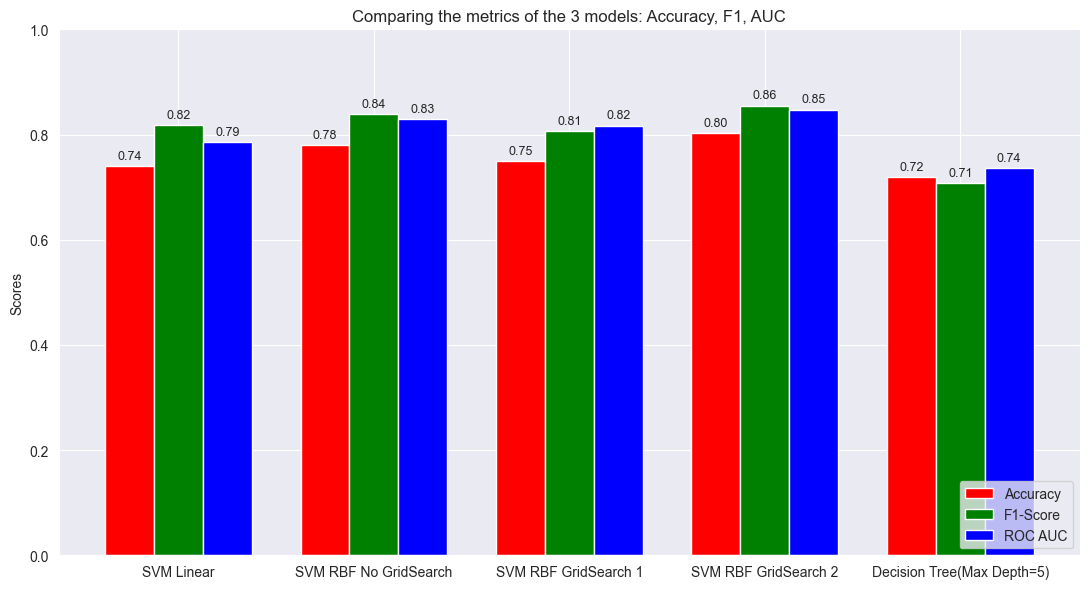

In [65]:

# Importing the data we found
models = ['SVM Linear', 'SVM RBF No GridSearch', 'SVM RBF GridSearch 1','SVM RBF GridSearch 2','Decision Tree(Max Depth=5)']
accuracy = [0.7398, 0.7806, 0.7500, 0.8031, 0.7184]
f1_scores = [0.8185, 0.8397, 0.8060, 0.8552, 0.7071]
auc_scores = [0.7861, 0.8297, 0.8170, 0.8477, 0.7365]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(11, 6))

rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='red')
rects2 = ax.bar(x, f1_scores, width, label='F1-Score', color='green')
rects3 = ax.bar(x + width, auc_scores, width, label='ROC AUC', color='blue')

ax.set_ylabel('Scores')
ax.set_title('Comparing the metrics of the 3 models: Accuracy, F1, AUC')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.0)


# Here we add the labels over the Barplot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

# PCA

Individual Variance (%):
[22.42 14.42 11.1   9.63  9.23  8.5   7.    6.15  5.31  3.65  2.58]


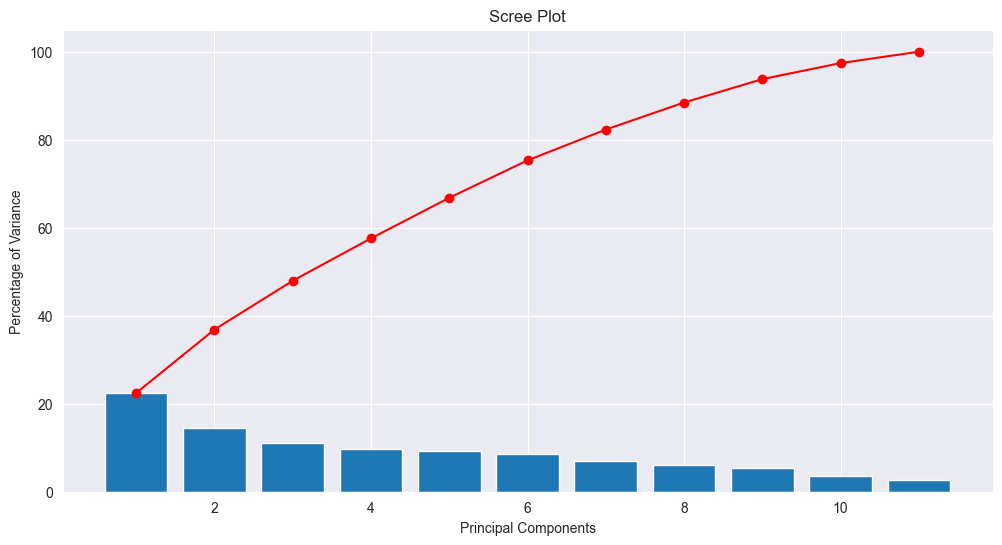

In [66]:
from sklearn.decomposition import PCA




scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_train_scaled)

pca = PCA()
pca.fit(X_std)

#
print("Individual Variance (%):")
print(np.round(pca.explained_variance_ratio_ * 100, 2))

# 5. Scree Plot
plt.figure(figsize=(12, 6))
plt.bar(range(1, 12), pca.explained_variance_ratio_ * 100)
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o', color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.show()


# Conclusions
- The comparative analysis of the white wine dataset highlights the superiority of the SVM RBF kernel over linear and tree-based models.

- While initial optimization attempts (Grid Search 1) led to significant overfitting, a refined hyperparameter strategy (Grid Search 2) achieved the optimal balance, yielding a Test Accuracy of 80.31% and an AUC of 0.8477.

- The consistent gap in performance between the Linear SVM and the RBF models confirms the non-linear nature of the chemical interactions that determine white wine quality.

- The integration of StandardScaler with a carefully tuned RBF kernel provides the most robust and accurate framework for wine quality prediction.

- In the white wine dataset, the variance is widely distributed, with the first principal component (PC1) explaining only 22.42% of the total variance. A minimum of seven components is required to reach the 82% threshold, indicating a high-dimensional and complex chemical structure. This  explains why non-linear models like the SVM RBF were necessary to achieve high accuracy (80.31%),multidimensional space that simpler models, such as Decision Trees, fail to work.